In [52]:
from pylab import mpl,plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [55]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/image-recognition-tensorflow-master/chihuahua-muffin/train_set',
  labels='inferred')

Found 10 files belonging to 2 classes.


In [56]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/image-recognition-tensorflow-master/chihuahua-muffin/validation_set',
  labels='inferred')

Found 16 files belonging to 2 classes.


In [57]:
class_names = train_ds.class_names
print(class_names)

['Dog', 'Muffin']


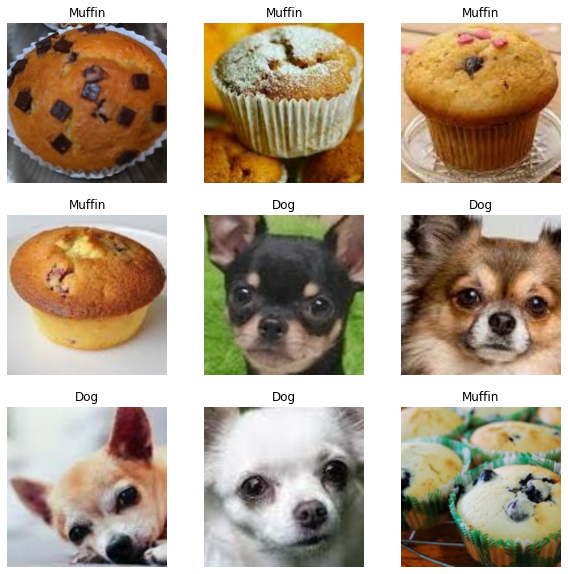

In [82]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [59]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 256, 256, 3)
(10,)


In [60]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [61]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [62]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99605453


In [63]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)       

In [66]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 1.0774 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 976ms/step - loss: 0.5897 - accuracy: 0.5000 - val_loss: 6.1447 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 958ms/step - loss: 4.7131 - accuracy: 0.5000 - val_loss: 2.1553 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 938ms/step - loss: 1.3195 - accuracy: 0.5000 - val_loss: 0.6679 - val_accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - 1s 960ms/step - loss: 0.3080 - accuracy: 0.9000 - val_loss: 0.9539 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 938ms/step - loss: 0.4372 - accuracy: 0.6000 - val_loss: 0.7517 - val_accuracy: 0.5625
Epoch 7/10
1/1 [==============================] - 1s 999ms/step - loss: 0.2344 - accuracy: 0.9000 - val_loss: 0.7094 - val_accuracy: 0.6250
Epoch 8/10
1/1 [=======

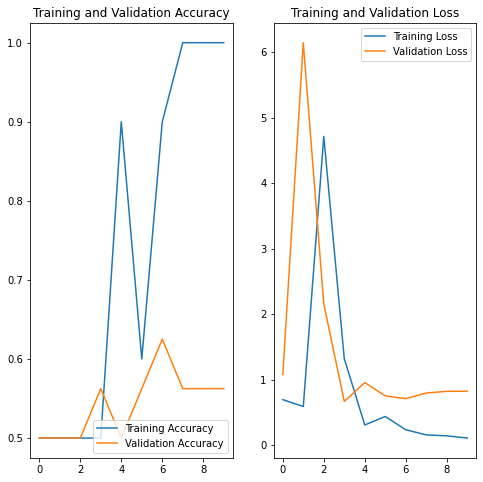

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [68]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

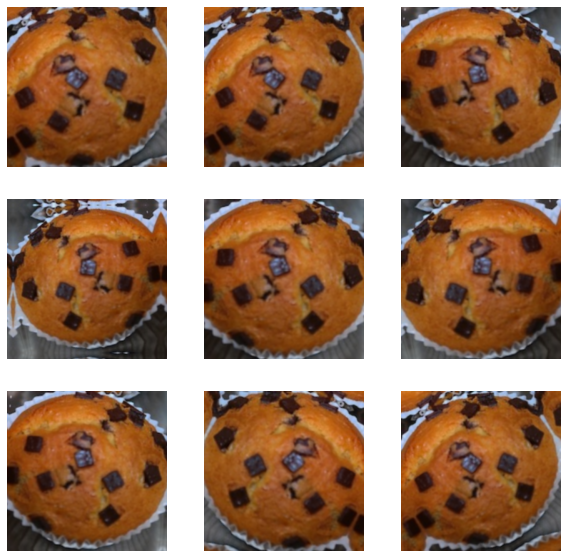

In [69]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [108]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [109]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)      

In [111]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 1.0945 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 0.8469 - accuracy: 0.5000 - val_loss: 7.3995 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 7.5683 - accuracy: 0.5000 - val_loss: 3.3945 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 3.4233 - accuracy: 0.5000 - val_loss: 0.7279 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 0.5160 - accuracy: 0.8000 - val_loss: 1.8992 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 1s 1s/step - loss: 1.5034 - accuracy: 0.5000 - val_loss: 1.3598 - val_accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 0.8760 - accuracy: 0.5000 - val_loss: 0.6372 - val_accuracy: 0.6250
Epoch 8/15
1/1 [=========================

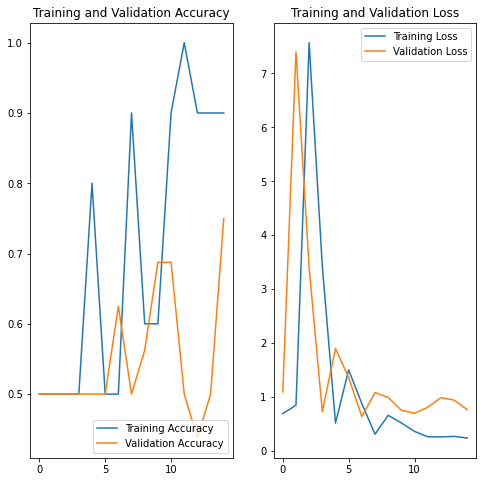

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(122)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [113]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/image-recognition-tensorflow-master/chihuahua-muffin/test_set/muffin_unseen_4.jpg', 
    target_size=(256, 256)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Dog with a 78.19 percent confidence.
